In [4]:
import pandas as pd
import numpy as no
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\ACER\Desktop\Projects\Project_ml\heart_updated.csv")

In [6]:
df.head(5)

,age,sex,trtbps,chol,fbs,exng,output
0,63,Male,145,233,1,0,1
1,37,Male,130,250,0,0,1
2,41,Female,130,204,0,0,1
3,56,Male,120,236,0,0,1
4,57,Female,120,354,0,1,1


In [10]:


# Use the .rename() method with a dictionary containing multiple entries
df = df.rename(columns={'chol': 'cholesterol', 'trtbps': 'resting_blood_pressure'})

# Print the updated column names to verify the changes
print(df.columns)

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fbs', 'exng',
       'output'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     303 non-null    int64 
 1   sex                     303 non-null    object
 2   resting_blood_pressure  303 non-null    int64 
 3   cholesterol             303 non-null    int64 
 4   fbs                     303 non-null    int64 
 5   exng                    303 non-null    int64 
 6   output                  303 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 16.7+ KB


In [83]:
median_chol = df['chol'].median()
df['chol'].fillna(median_chol, inplace=True)

KeyError: 'chol'

In [14]:
num_var=["age","resting_blood_pressure","cholesterol"]
cat_var=["fbs","exng"]

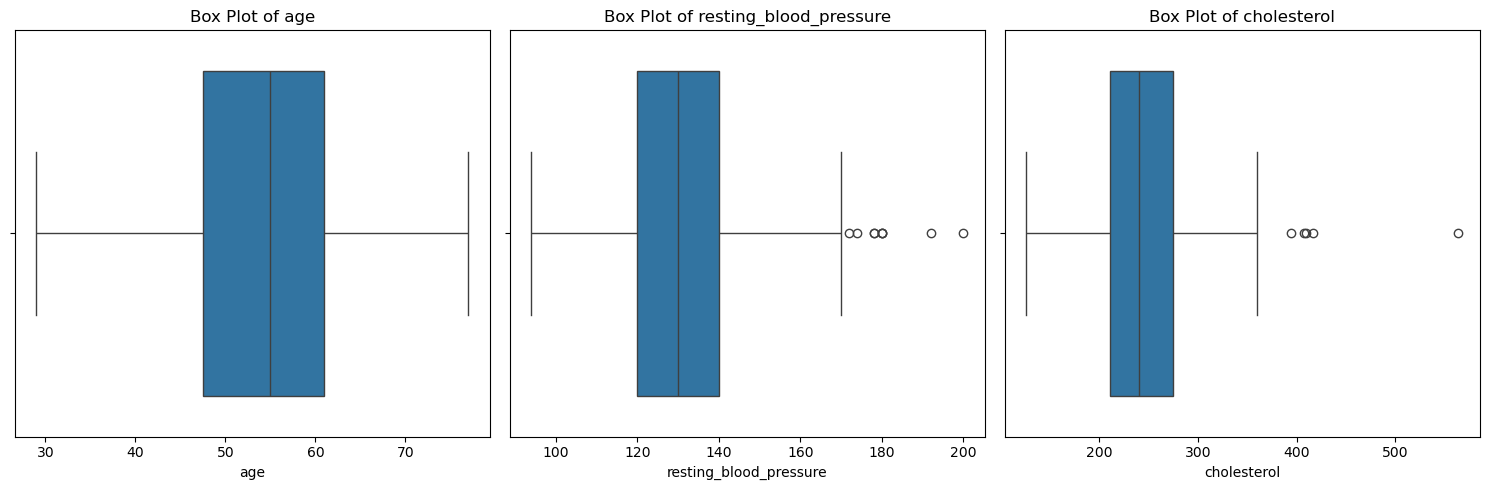

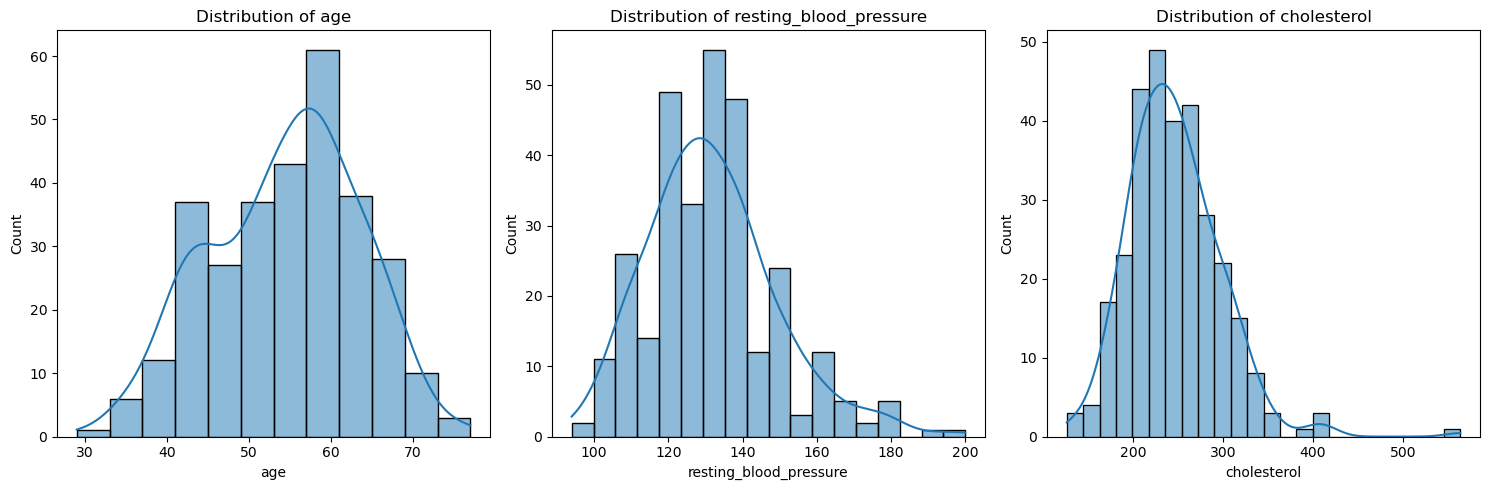

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_var):
    plt.subplot(1, len(num_var), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Plot Distribution Plots for each numeric variable
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_var):
    plt.subplot(1, len(num_var), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Pie Chart of Sex Distribution')

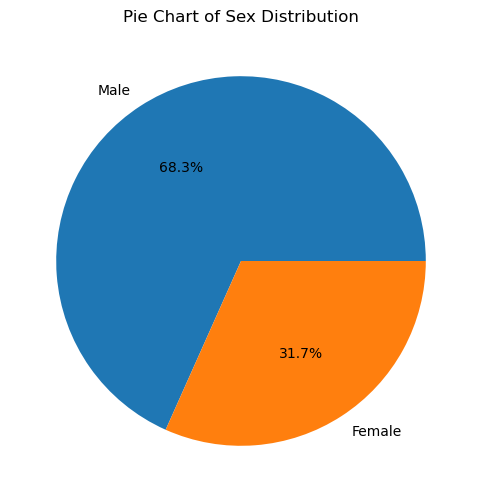

In [17]:
gender_counts = df['sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Sex Distribution')

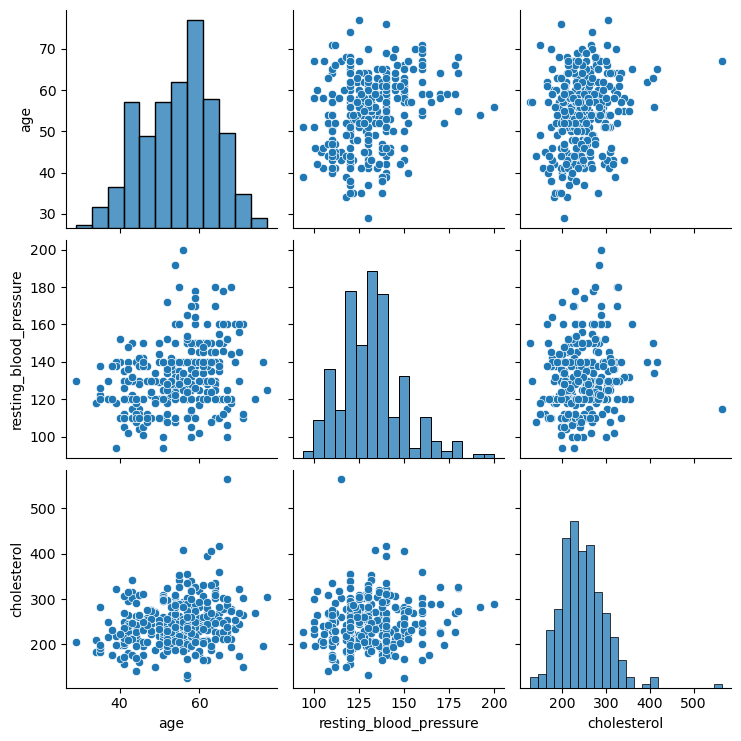

In [20]:
# 1. Pairplot for numerical columns
sns.pairplot(df[num_var])
plt.show()

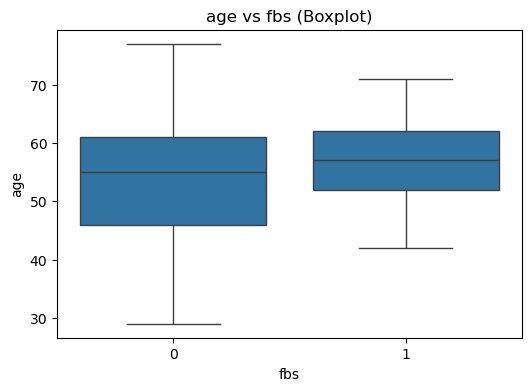

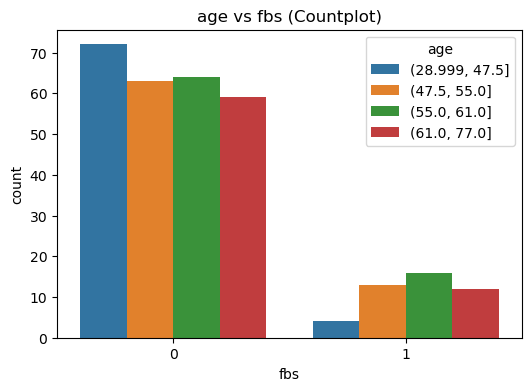

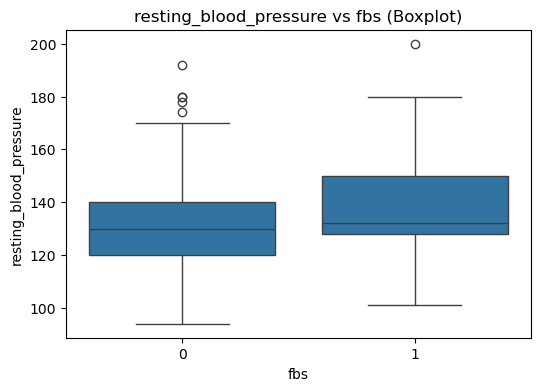

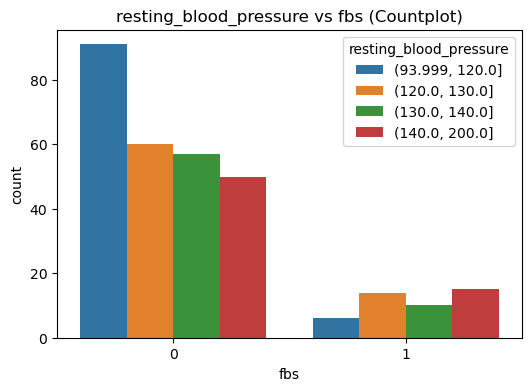

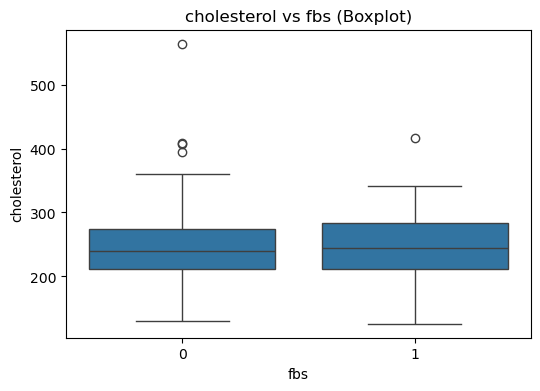

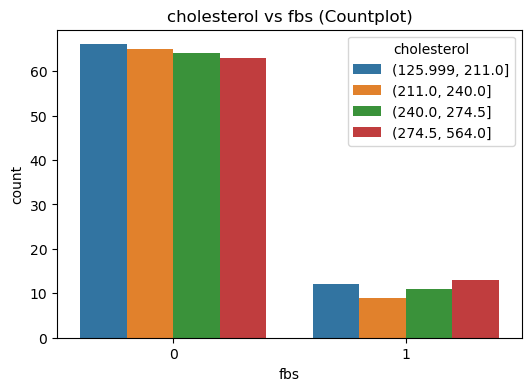

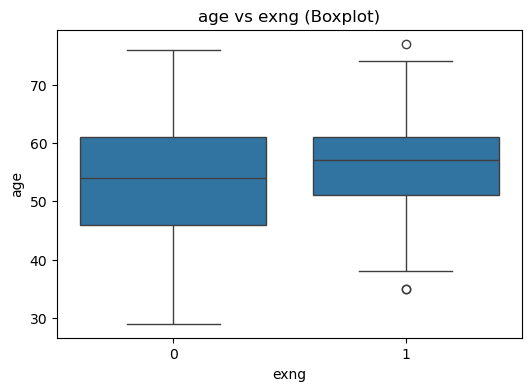

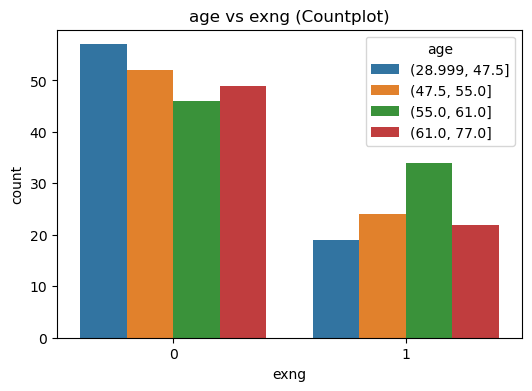

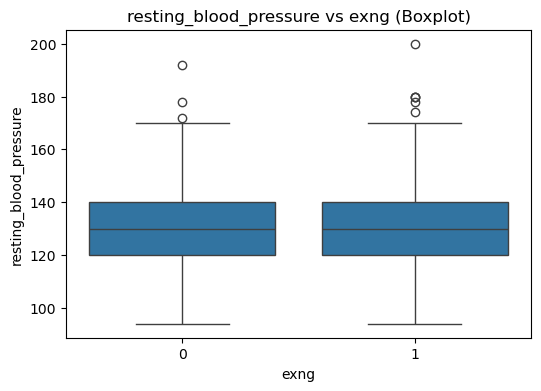

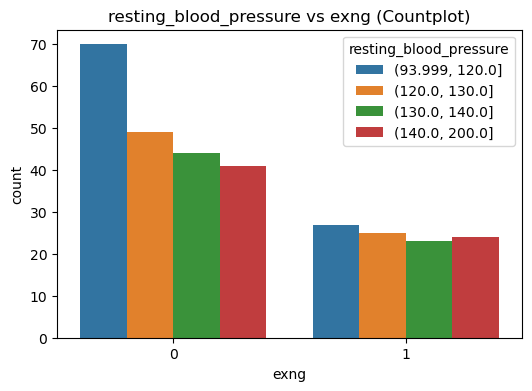

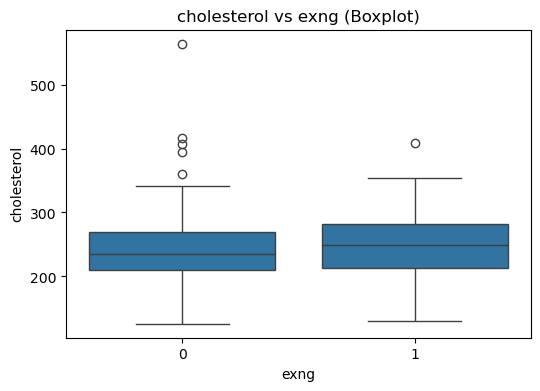

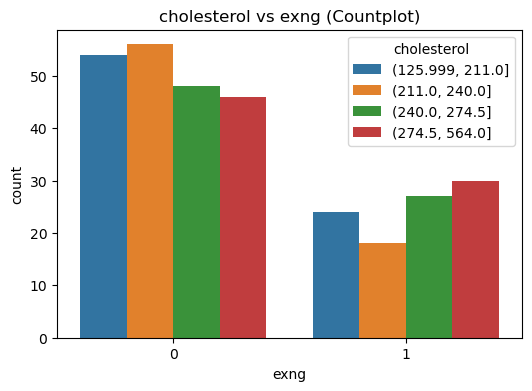

In [22]:
for cat in cat_var:
    for num in num_var:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f"{num} vs {cat} (Boxplot)")
        plt.show()
        
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[cat], hue=pd.qcut(df[num], q=4, duplicates='drop'))
        plt.title(f"{num} vs {cat} (Countplot)")
        plt.show()


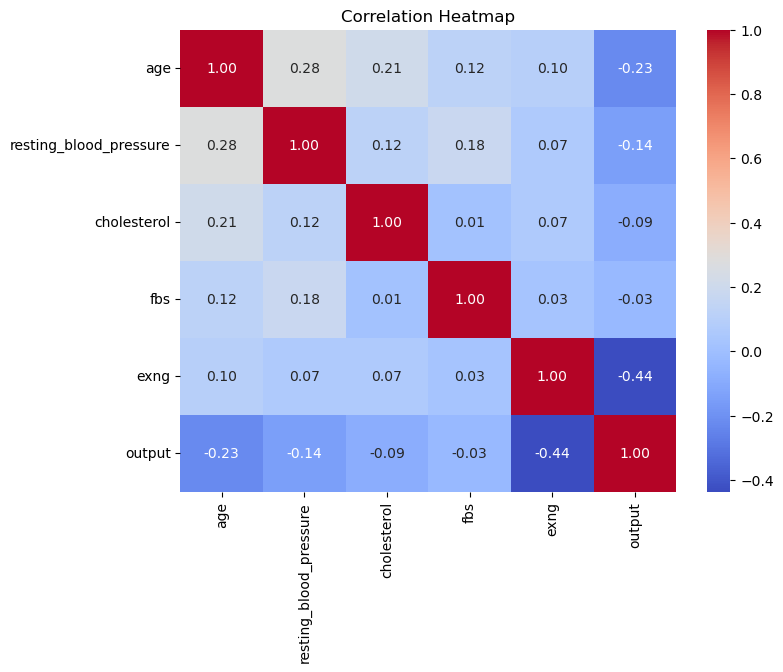

In [23]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)   # get correlation only for numeric cols
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

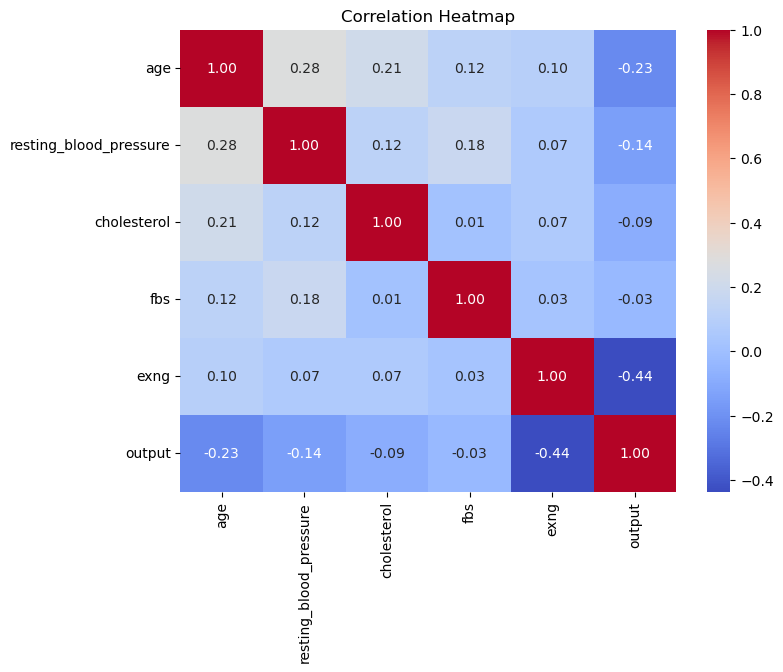

In [24]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)   # get correlation only for numeric cols
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
import numpy as np
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['cholesterol'] = np.where(df['cholesterol'] > upper_bound, upper_bound,
                             np.where(df['cholesterol'] < lower_bound, lower_bound, df['cholesterol']))

In [30]:
df

,age,sex,resting_blood_pressure,cholesterol,fbs,exng,output
0,63,Male,145,233.0,1,0,1
1,37,Male,130,250.0,0,0,1
2,41,Female,130,204.0,0,0,1
3,56,Male,120,236.0,0,0,1
4,57,Female,120,354.0,0,1,1
...,...,...,...,...,...,...,...
298,57,Female,140,241.0,0,1,0
299,45,Male,110,264.0,0,0,0
300,68,Male,144,193.0,1,0,0
301,57,Male,130,131.0,0,1,0


In [32]:
sex_mapping = {'Male': 0, 'Female': 1}

# Apply the mapping to the 'sex' column
df['sex'] = df['sex'].map(sex_mapping)

In [46]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor




X = df.drop(columns=["output"]).select_dtypes(include=["number"])

# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature        VIF
0                     age  36.087565
1                     sex   1.557061
2  resting_blood_pressure  39.160428
3             cholesterol  25.830050
4                     fbs   1.204680
5                    exng   1.547004


In [56]:
# Reverse mapping
reverse_mapping = {0: 'Male', 1: 'Female'}

# Map back
df['sex'] = df['sex'].map(reverse_mapping)


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ------------------------------
# Load dataset


# ------------------------------
# Features and target
# Corrected column names
# ------------------------------
X = df[['age', 'resting_blood_pressure', 'cholesterol', 'sex']]
y = df['output']

# ------------------------------
# Define columns
# ------------------------------
numeric_features = ['age', 'resting_blood_pressure', 'cholesterol']
categorical_features = ['sex']

# ColumnTransformer: scaling + OHE
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# ------------------------------
# Apply transformation
# ------------------------------
X_transformed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

print("\n--- Model Performance ---")

# ------------------------------
# Helper function for metrics
# ------------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------------
# Logistic Regression
# ------------------------------
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
evaluate_model("Logistic Regression", log_clf, X_test, y_test)

# ------------------------------
# Random Forest
# ------------------------------
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate_model("Random Forest", rf_clf, X_test, y_test)

# ------------------------------
# Support Vector Machine (SVM)
# ------------------------------
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
evaluate_model("Support Vector Machine (SVM)", svm_clf, X_test, y_test)

# ------------------------------
# K-Nearest Neighbors (KNN)
# ------------------------------
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors (KNN)", knn_clf, X_test, y_test)

# ------------------------------
# Decision Tree
# ------------------------------
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
evaluate_model("Decision Tree", dt_clf, X_test, y_test)



--- Model Performance ---

Logistic Regression
Accuracy : 0.6065573770491803
Precision: 0.6428571428571429
Recall   : 0.5625
F1 Score : 0.6
Confusion Matrix:
 [[19 10]
 [14 18]]

Random Forest
Accuracy : 0.6065573770491803
Precision: 0.6538461538461539
Recall   : 0.53125
F1 Score : 0.5862068965517241
Confusion Matrix:
 [[20  9]
 [15 17]]

Support Vector Machine (SVM)
Accuracy : 0.6721311475409836
Precision: 0.6875
Recall   : 0.6875
F1 Score : 0.6875
Confusion Matrix:
 [[19 10]
 [10 22]]

K-Nearest Neighbors (KNN)
Accuracy : 0.6721311475409836
Precision: 0.7307692307692307
Recall   : 0.59375
F1 Score : 0.6551724137931034
Confusion Matrix:
 [[22  7]
 [13 19]]

Decision Tree
Accuracy : 0.7049180327868853
Precision: 0.75
Recall   : 0.65625
F1 Score : 0.7
Confusion Matrix:
 [[22  7]
 [11 21]]


In [66]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, # 5-fold cross-validation
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

# Fit the grid search to the data
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV finished.")

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Starting GridSearchCV...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\ACER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:37:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV finished.
Best parameters found:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best accuracy found:  0.6854591836734694


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# ------------------------------
# Load dataset
# ------------------------------


# Features and target
X = df[['age', 'resting_blood_pressure', 'cholesterol', 'sex']]
y = df['output']

# ------------------------------
# Define columns
# ------------------------------
numeric_features = ['age', 'resting_blood_pressure', 'cholesterol']
categorical_features = ['sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Transform input features
X_transformed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# ------------------------------
# Train XGBoost with given hyperparameters
# ------------------------------
xgb = XGBClassifier(
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=300,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# ------------------------------
# Accuracy on test set
# ------------------------------
y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

# ------------------------------
# Predict on new data
# ------------------------------
new_data = pd.DataFrame({
    'age': [55],
    'resting_blood_pressure': [130],
    'cholesterol': [250],
    'sex': ['Male']
})

# Preprocess new data
new_data_transformed = preprocessor.transform(new_data)

# Prediction
prediction = xgb.predict(new_data_transformed)
print("Prediction for new data:", prediction)

# Prediction probability
probability = xgb.predict_proba(new_data_transformed)
print("Prediction probability:", probability)


C:\Users\ACER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.639344262295082
Prediction for new data: [0]
Prediction probability: [[0.550515 0.449485]]


In [ ]:
import os
os.getcwd()
